<a id="ref1"></a>
<h1>Linear Regression</h1>



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

Let's define the independent variable:

In [3]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

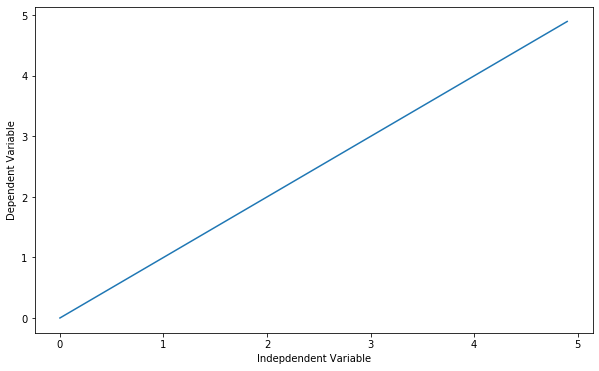

In [4]:
##You can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<a id="ref2"></a>
<h1>Linear Regression with TensorFlow</h1>


In [5]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


<h2>Understanding the Data</h2>

<h3><code>FuelConsumption.csv</code>:</h3>
We have downloaded a fuel consumption dataset, <b><code>FuelConsumption.csv</code></b>, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. <a href="http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64">Dataset source</a>

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [5]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

First, we initialize the variables <b>a</b> and <b>b</b>, with any random guess, and then we define the linear function:

In [7]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

In [8]:
loss = tf.reduce_mean(tf.square(y - train_y)) #loss Fucntion

In [9]:
optimizer = tf.train.GradientDescentOptimizer(0.05) # optimizer

In [10]:
train = optimizer.minimize(loss) #minimizing the loss , training methodology 

Don't forget to initialize the variables before executing a graph:

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Now we are ready to start the optimization and run the graph:

In [14]:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(_)
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

None
0 1007.99603 44.216812 105.43532
None
5 999.75037 43.864296 106.81092
None
10 992.6073 43.53619 108.091286
None
15 986.41907 43.230793 109.283005
None
20 981.0582 42.946545 110.39222
None
25 976.4136 42.681976 111.424644
None
30 972.39014 42.435722 112.38558
None
35 968.90405 42.20652 113.27999
None
40 965.88446 41.993187 114.11248
None
45 963.26843 41.79462 114.88733
None
50 961.0018 41.609806 115.60853
None
55 959.0387 41.437782 116.27979
None
60 957.33765 41.277676 116.90459
None
65 955.8641 41.12865 117.48612
None
70 954.58734 40.989944 118.02739
None
75 953.4815 40.86084 118.53119
None
80 952.5234 40.740673 119.000114
None
85 951.69324 40.628822 119.43656
None
90 950.9741 40.524723 119.8428
None
95 950.3514 40.42783 120.22091


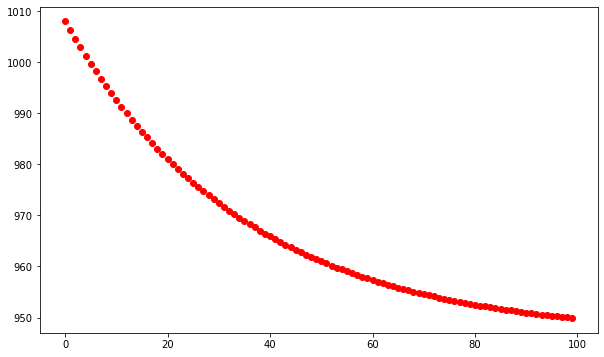

In [16]:
plt.plot(loss_values, 'ro')

Lets visualize how the coefficient and intercept of line has changed to fit the data:

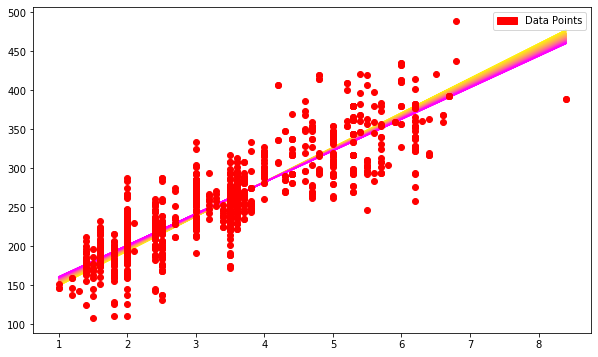

In [17]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()